<a href="https://colab.research.google.com/github/jacobmlloyd/credit-risk-modeling/blob/main/Loan_Risk_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

This dataset uses publicly available Lending Tree data on loans and whether the loan was considered Good or Bad (depending on the outcome of the loans payments). 

## Data Dictionary

| Name   | Description                                    |
|--------|------------------------------------------------|
| YOB    | Year of Birth (99 if unknown)                  |
| NKID   | Number of Children                             |
| DEP    | Number of Other Dependents                     |
| PHON   | Is there a homephone? 1 = yes; 0 = no          |
| SINC   | Spouses Income                                 |
| AES    | Applicants Employment Status (See Notes Below) |
| DAINC  | Applicants Income                              |
| RES    | Residential Status (See Notes Below)           |
| DHVAL  | Value of Home                                  |
| DMORT  | Outstanding Mortgage Balance                   |
| DOUTM  | Outgoings on Mortgage or Rent                  |
| DOUTL  | Outgoings on Loans                             |
| DOUTHP | Outgoings on Hire Purchase                     |
| DOUTCC | Outgoings on Credit Cards                      |
| BAD    | 1 = Bad, 0 = Good                              |

> AES Options: V = Government,
  W = housewife,
  M = military,
  P = private sector,
  B = public sector,
  R = retired,
  E = self employed,
  T = student,
  U = unemployed,
  N = others,
  Z  = no response

> RES Options: O = Owner,
  F = tenant furnished,
  U = Tenant Unfurnished,
  P = With parents,
  N = Other,
  Z = No response,

> DHVAL Options: 0 = no response or not owner,
  000001 = zero value,
  blank = no response,

> DMORT Options: 0 = no response or not owner,
  000001 = zero balance,
  blank = no response,

# Import and View the Data

## Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Load and view the dataset

Let's view the data head to get an idea of the data we are working with.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jacobmlloyd/credit-risk-modeling/main/Loan%20Data.csv")
df.head()

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
0,19.0,4.0,0.0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Viewing the shape and the info of the dataset will give us a better idea about our data.

In [3]:
print(df.shape)
print(df.info())

(1225, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YOB     1225 non-null   float64
 1   NKID    1225 non-null   float64
 2   DEP     1225 non-null   float64
 3   PHON    1225 non-null   int64  
 4   SINC    1225 non-null   float64
 5   AES     1225 non-null   object 
 6   DAINC   1225 non-null   float64
 7   RES     1225 non-null   object 
 8   DHVAL   1225 non-null   float64
 9   DMORT   1225 non-null   float64
 10  DOUTM   1225 non-null   float64
 11  DOUTL   1225 non-null   float64
 12  DOUTHP  1225 non-null   float64
 13  DOUTCC  1225 non-null   float64
 14  BAD     1225 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 143.7+ KB
None


For this dataset we are going to use all of our features, or columns. 

# Cleaning the Data

Identify and handle duplicate values

In [4]:
print(f"There are {df.duplicated().sum()} duplicate rows.")

There are 23 duplicate rows.


In [5]:
df.drop_duplicates(inplace = True)

In [6]:
print(f"There are {df.duplicated().sum()} duplicate rows.")

There are 0 duplicate rows.


Look for missing values

In [7]:
print(f"There are {df.isna().sum().sum()} missing values.")

There are 0 missing values.


Next let's look for possible inconsistencies

In [8]:
df.describe()

,YOB,NKID,DEP,PHON,SINC,DAINC,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,50.772879,0.635607,0.039101,0.901830,2028.164725,21608.285358,15994.156406,11440.492512,348.549085,124.259567,29.271215,40.352745,0.263727
std,15.232284,1.021988,0.221948,0.297668,4840.129086,15788.943238,20818.817347,19004.622659,429.422730,847.470142,120.394389,170.214916,0.440836
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,1.000000,0.000000,9464.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,1.000000,0.000000,19800.000000,0.000000,0.000000,280.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,1.000000,0.000000,1.000000,1245.000000,30900.000000,30080.000000,20348.000000,536.000000,0.000000,0.000000,0.000000,1.000000
max,99.000000,5.000000,2.000000,1.000000,50000.000000,64800.000000,64928.000000,64000.000000,3800.000000,28000.000000,1600.000000,2800.000000,1.000000


Though it appears there could possibly be outliers, after reviewing each value and the data describe table, I've concluded there is no need to address the outliers as they are valid points of data in the dataframe. 

In [9]:
for column in df.columns:
  if df[column].dtype == "O":
    print(f"COLUMN {column}:")
    print(df[column].value_counts())
    print("-----")

COLUMN AES:
P    530
V    230
E    124
R    103
T    103
W     37
B     30
M     23
U      8
Z      8
N      6
Name: AES, dtype: int64
-----
COLUMN RES:
O    624
P    231
U    153
F    129
N     65
Name: RES, dtype: int64
-----


There doesn't seem to be inconsistencies here.

# Visual

To better inform us about the values in the data we are working with we should visualize the data we are working with. The easiest way to do this is to put the numerical data into histograms and view each seperately.

<function matplotlib.pyplot.show>

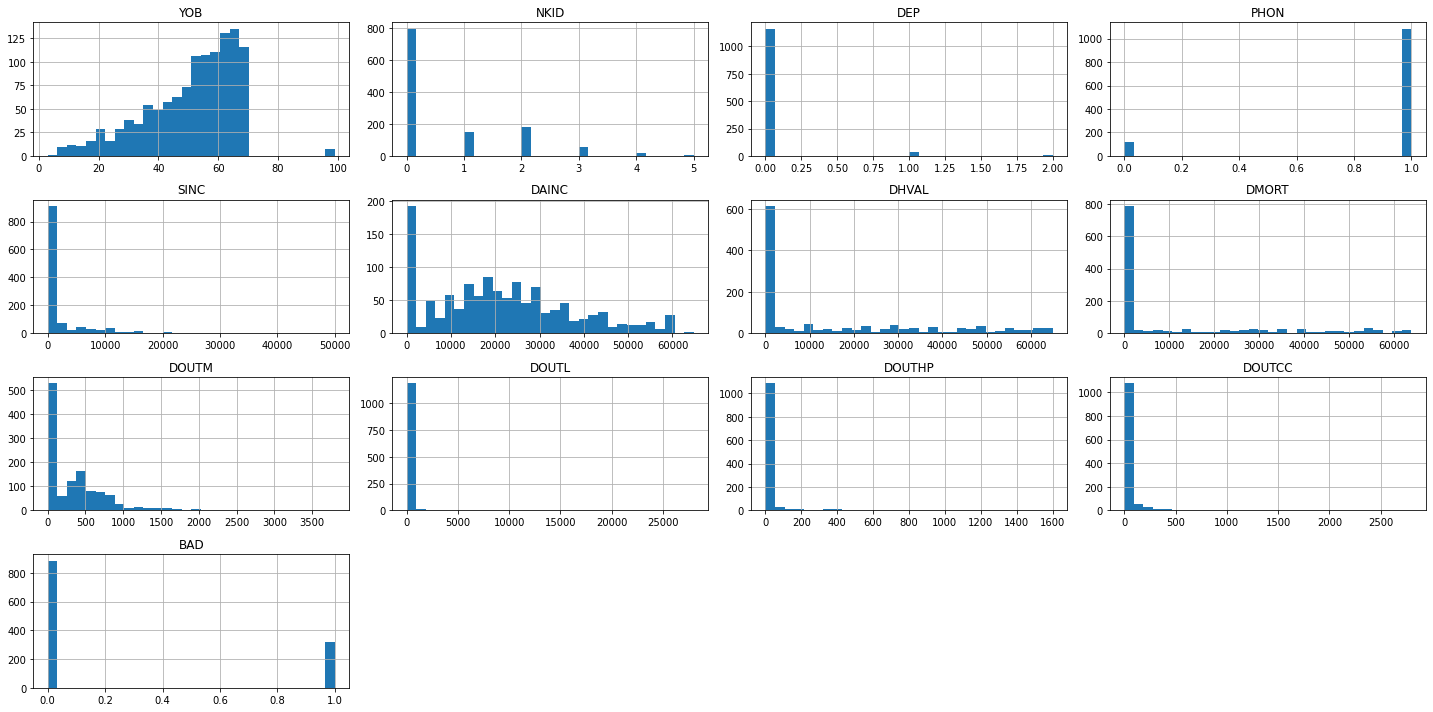

In [10]:
df.hist(figsize=(20, 10), bins=30)
plt.tight_layout()
plt.show

In order for us to view the categorical data, we will create custom histograms.

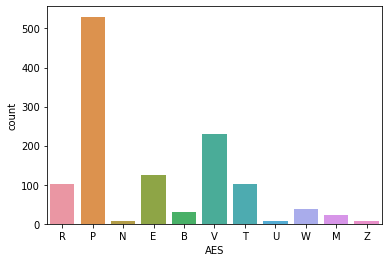

In [11]:
sns.countplot(x = df['AES'])

We can see that P (private sector) is the largest area of the applicants employment status by far. 

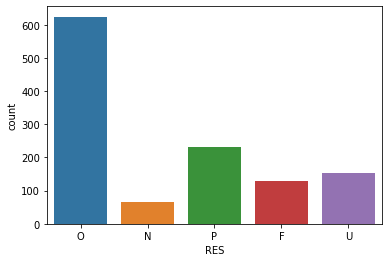

In [12]:
sns.countplot(x = df['RES'])

Viewing this data on the residential status shows that most of our data is based off of homeowners. We will dive into this more during our exploratory analysis.

## Heatmap

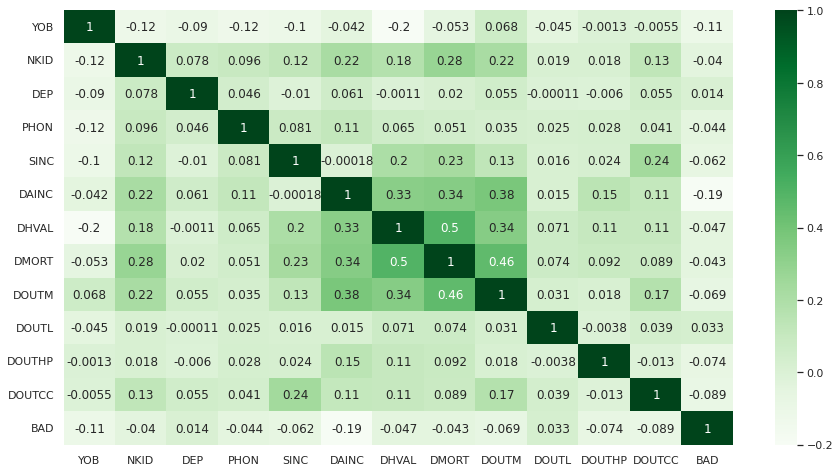

In [13]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap = 'Greens', annot = True)

Our heatmap allows us to see that there isn't a strong correlation betwee my target (BAD) and any other features. I can see between DAINC, DHVAL, DMORT, and DOUTM, there is a bit of correlation.